In [1]:
#We load the DataFrame.
from sodapy import Socrata
import pandas as pd


client = Socrata("analisi.transparenciacatalunya.cat", None)

result1 = client.get("q2sg-894k", limit=150000)
result2 = client.get("6rcq-y46b", limit=300)

phone_calls = pd.DataFrame.from_records(result1)
real_cases = pd.DataFrame.from_records(result2)

Text(0.5, 0.95, 'Is there any correlation?')

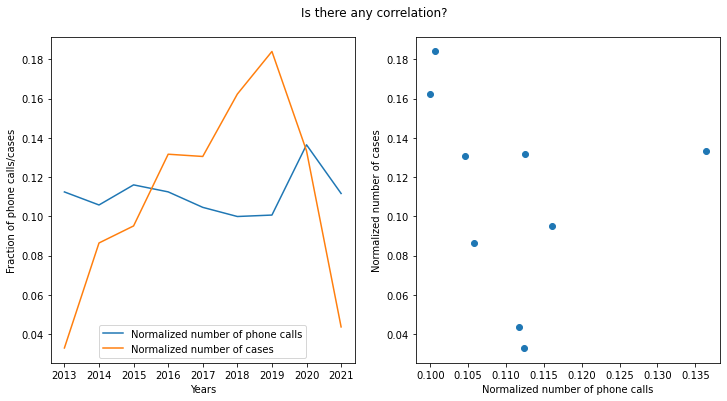

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt


series_calls = dict(phone_calls['any'].value_counts() / phone_calls['any'].value_counts().sum())

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

first_year = 2013
final_year = 2021
years, number_cases, number_calls = [], [], []
for year in range(first_year, final_year+1):
    series_cases = real_cases[real_cases['any'] == str(year)]['v_ctimes_ateses']
    years.append(year)
    number_calls.append(series_calls[str(year)])
    number_cases.append(sum(map(int, series_cases.values)))
number_cases = [n/sum(number_cases) for n in number_cases]

axs[0].plot(years, number_calls, label='Normalized number of phone calls')
axs[0].plot(years, number_cases, label='Normalized number of cases')
axs[0].set_xlabel('Years')
axs[0].set_xticks(range(first_year, final_year+1))
axs[0].set_ylabel('Fraction of phone calls/cases')
axs[0].legend()

axs[1].scatter(number_calls, number_cases, marker='o')
axs[1].set_xlabel('Normalized number of phone calls')
axs[1].set_ylabel('Normalized number of cases')

fig.suptitle('Is there any correlation?', y=0.95)

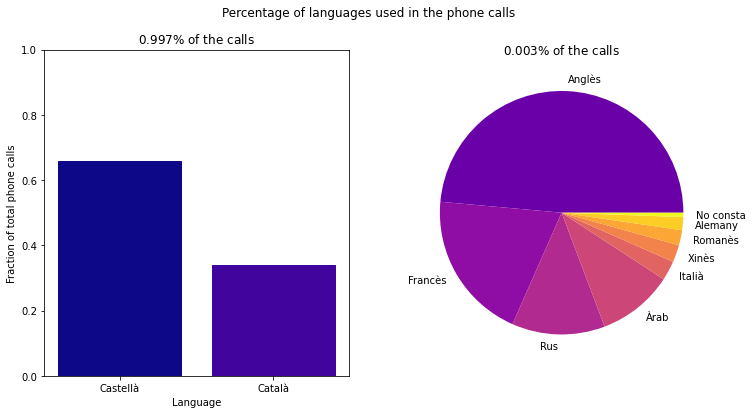

In [4]:
%matplotlib inline

#Simple example.
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np


cmap = cm.get_cmap('plasma')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

language = phone_calls['llengua'].value_counts()
values = language.values / language.values.sum()
labels = language.index

n = len(values)
colors = [cmap(int(256*i/(n-1))) for i in range(n)]

fig.suptitle('Percentage of languages used in the phone calls')

#Bar plot.
bars = axs[0].bar(labels[:2], values[:2])
bars[0].set_color(colors[0])
bars[1].set_color(colors[1])

axs[0].set_title(f'${sum(values[:2]):.3f}\%$ of the calls')
axs[0].set_xlabel('Language')
axs[0].set_ylabel('Fraction of total phone calls')
axs[0].set_ylim(0, 1)

#Pie plot.
axs[1].pie(x=values[2:],
           labels=labels[2:],
           colors=colors[2:],
           normalize=True)

_ = axs[1].set_title(f'${sum(values[2:]):.3f}\%$ of the calls')

In [5]:
%matplotlib inline

from ipywidgets import interact, IntSlider

import matplotlib.pyplot as plt
import numpy as np


months = 12
conversion = {
    'Gener': 1,
    'Febrer': 2,
    'Març': 3,
    'Abril': 4,
    'Maig': 5,
    'Juny': 6,
    'Juliol': 7,
    'Agost': 8,
    'Setembre': 9,
    'Octubre': 10,
    'Novembre': 11,
    'Desembre': 12
}
english_names = [
    'January',
    'February',
    'March',
    'April',
    'May',
    'June',
    'July',
    'August',
    'September',
    'October',
    'November',
    'December'
]

def main(final_year):
    first_year = 2013
    years = (final_year-first_year) + 1
    
    plt.grid(linewidth=0.1)

    square = np.zeros(months)
    cumulative = np.zeros(months)
    for year in range(first_year, final_year+1):
        series = phone_calls[phone_calls['any'] == str(year)]['mes'].value_counts()
        #I convert the name of each month to its associated value to sort them.
        series.index = [conversion[month] for month in series.index]
        series = series.sort_index()
        try:
            square += series.values**2
            cumulative += series.values
        #I do this because this year's data covers only 8 months,
        #so I have to extend the array manually.
        except ValueError:
            square += list(series.values**2) + [0, 0]
            cumulative += list(series.values) + [0, 0]
        
        plt.plot(series.index, series.values, linewidth=0.5, color='tab:gray')
    square /= years
    cumulative /= years
    
    error = np.sqrt((square-cumulative**2)/years)
    
    plt.axhline(sum(cumulative)/len(cumulative), linestyle='--', color='tab:orange')
    plt.errorbar(range(1, months+1),
                 cumulative,
                 error,
                 elinewidth=2,
                 ecolor='tab:gray',
                 capsize=5,
                 marker='s',
                 markersize=8,
                 linewidth=3,
                 color='tab:blue')
    
    plt.xticks(range(1, months+1), english_names, rotation=45)
    
    plt.xlabel('Month')
    plt.ylabel('Number of phone calls')

if __name__ == '__main__':
    interact(main, final_year=IntSlider(min=2013, max=2021, step=1, value=2013))

interactive(children=(IntSlider(value=2013, description='final_year', max=2021, min=2013), Output()), _dom_cla…

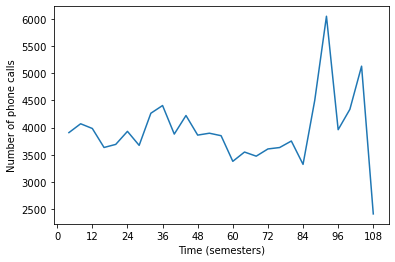

In [80]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


months = 12
conversion = {
    'Gener': 1,
    'Febrer': 2,
    'Març': 3,
    'Abril': 4,
    'Maig': 5,
    'Juny': 6,
    'Juliol': 7,
    'Agost': 8,
    'Setembre': 9,
    'Octubre': 10,
    'Novembre': 11,
    'Desembre': 12
}

first_year = 2013
final_year = 2021
years = (final_year-first_year) + 1

x_temp, y_temp = [], []
for idx, year in enumerate(range(first_year, final_year+1)):
    series = phone_calls[phone_calls['any'] == str(year)]['mes'].value_counts()
    #I convert the name of each month to its associated value to sort them.
    series.index = [conversion[month] for month in series.index]
    series = series.sort_index()
    
    x_temp += list(series.index + 12*idx)
    y_temp += list(series.values)

x_data, y_data = [], []
for i in range(0, len(x_temp), 4):
    x_data.append(i+4)
    y_data.append(sum(y_temp[i:i+4]))

plt.xticks(range(0, 108+1, 12))
plt.ylabel('Number of phone calls')
plt.xlabel('Time (semesters)')
plt.plot(x_data, y_data)
plt.show()

In [7]:
%matplotlib qt

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

FLAG = 0
def update_vbars(num, data):
    global FLAG
    if FLAG == 0 and num == 0:
        FLAG = 1
        return
    ax.text(data[num]-months/2, 6250, f'{num+2013}', horizontalalignment='center')
    if num < 8:
        ax.axvline(data[num], linestyle='--', linewidth=0.5, color='tab:gray')

def update_lines(num, data_lines, lines):
    for line, data in zip(lines, data_lines):
        line.set_xdata([data[i][0] for i in range(num)])
        line.set_ydata([data[i][1] for i in range(num)])
    return lines


months = 12
conversion = {
    'Gener': 1,
    'Febrer': 2,
    'Març': 3,
    'Abril': 4,
    'Maig': 5,
    'Juny': 6,
    'Juliol': 7,
    'Agost': 8,
    'Setembre': 9,
    'Octubre': 10,
    'Novembre': 11,
    'Desembre': 12
}

first_year = 2013
final_year = 2021
years = (final_year-first_year) + 1

x_temp, y_temp = [], []
for idx, year in enumerate(range(first_year, final_year+1)):
    series = phone_calls[phone_calls['any'] == str(year)]['mes'].value_counts()
    #I convert the name of each month to its associated value to sort them.
    series.index = [conversion[month] for month in series.index]
    series = series.sort_index()
    
    x_temp += list(series.index + 12*idx)
    y_temp += list(series.values)

vbars = [12*i for i in range(1, years+1)]

fig, ax = plt.subplots()

ax.set_xlim(0, 108)
ax.set_xticks(range(0, 108+1, 12))
ax.set_xlabel('Time (semesters)')

ax.set_ylim(2500, 6500)
ax.set_ylabel('Number of phone calls')

temp = []
for i in range(0, len(x_temp), 4):
    temp.append([i+4, sum(y_temp[i:i+4])])

lines = [ax.plot([point[0]], [point[1]], linewidth=3, color='tab:blue')[0] for point in temp]

frame_rate = 300
ani2 = animation.FuncAnimation(fig,
                               update_vbars,
                               len(vbars),
                               fargs=([vbars]),
                               interval=3*frame_rate,
                               repeat=False)
ani1 = animation.FuncAnimation(fig,
                               update_lines,
                               len(temp)+1,
                               fargs=([temp], lines),
                               interval=frame_rate,
                               repeat=False)
plt.show()